In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping


import numpy as np
import matplotlib.pyplot as plt


# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)


# 데이터를 확인해 보겠습니다.
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

2110848/2110848 [==============================] - 0s 0us/step
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [2]:

# 단어의 수를 맞추어 줍니다.
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)


# 원-핫 인코딩 처리를 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))


# 모델의 실행 옵션을 정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)


# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])


# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1/200
450/450 [==============================] - 40s 81ms/step - loss: 2.2199 - accuracy: 0.4299 - val_loss: 3.3732 - val_accuracy: 0.2057
Epoch 2/200
450/450 [==============================] - 33s 73ms/step - loss: 1.8311 - accuracy: 0.5235 - val_loss: 1.7593 - val_accuracy: 0.5454
Epoch 3/200
450/450 [==============================] - 33s 74ms/step - loss: 1.6456 - accuracy: 0.5767 - val_loss: 1.6303 - val_accuracy: 0.5859
Epoch 4/200
450/450 [==============================] - 33s 73ms/step - loss: 1.4731 - accuracy: 0.6227 - val_loss: 1.4697 - val_accuracy: 0.6264
Epoch 5/200
450/450 [==============================] - 34s 76ms/step - loss: 1.2973 - accuracy: 0.6611 - val_loss: 1.3428 - val_accuracy: 0.6496
Epoch 6/200
450/450 [==============================] - 31s 69ms/step - loss: 1.1724 - accuracy: 0.7018 - val_loss: 1.2628 - val_accuracy: 0.6839
Epoch 7/200
450/450 [==============================] - 34s 76ms/step - loss: 1.0724 - accuracy: 0.7257 - val_loss: 1.2369 - val_ac

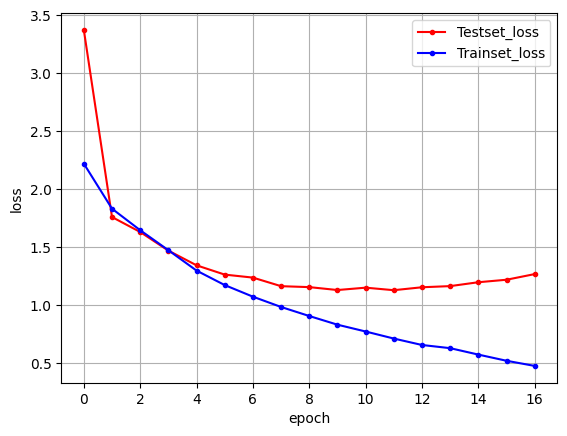

In [3]:
# 학습셋과 테스트셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']


# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping


import numpy as np
import matplotlib.pyplot as plt


# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)


# 단어의 수를 맞추어 줍니다.
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)


# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 56        
                                                      

In [6]:
# 모델의 실행 옵션을 정합니다.
import tensorflow as tf
with tf.device('/CPU:0'):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


    # 학습의 조기 중단을 설정합니다.
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)


    # 모델을 실행합니다.
    history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])


    # 테스트 정확도를 출력합니다.
    print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 [==============================] - 74s 152ms/step - loss: 0.4142 - accuracy: 0.7924 - val_loss: 0.2980 - val_accuracy: 0.8755
Epoch 2/100
469/469 [==============================] - 75s 161ms/step - loss: 0.2426 - accuracy: 0.9063 - val_loss: 0.2934 - val_accuracy: 0.8798
Epoch 3/100
469/469 [==============================] - 73s 157ms/step - loss: 0.1810 - accuracy: 0.9331 - val_loss: 0.2679 - val_accuracy: 0.8934
Epoch 4/100
469/469 [==============================] - 78s 167ms/step - loss: 0.1481 - accuracy: 0.9473 - val_loss: 0.3013 - val_accuracy: 0.8883
Epoch 5/100
469/469 [==============================] - 79s 169ms/step - loss: 0.1176 - accuracy: 0.9589 - val_loss: 0.3387 - val_accuracy: 0.8755
Epoch 6/100
782/782 [==============================] - 26s 33ms/step - loss: 0.4222 - accuracy: 0.8674

 Test Accuracy: 0.8674


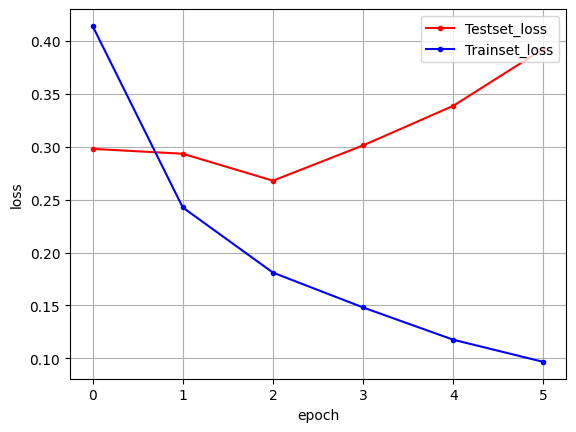

In [7]:
# 학습셋과 테스트셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']


# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()